### Import library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import pickle
from scipy import stats

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
df.columns = ['Cement','BF','FA','W','SP','CA','FAgg','Age','Compr_Str']

In [4]:
df.describe()

,Cement,BF,FA,W,SP,CA,FAgg,Age,Compr_Str
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
# The data doesn't have any missing values
# The mean quantity of Cement is 281
# The mean quantity of Blast Furnance Slag is 73.89
# Water quantity the mean is 181.56
# Superplastizer mean is 6.2
# Coarse aggregate 972.92
# Fine agg 773.57

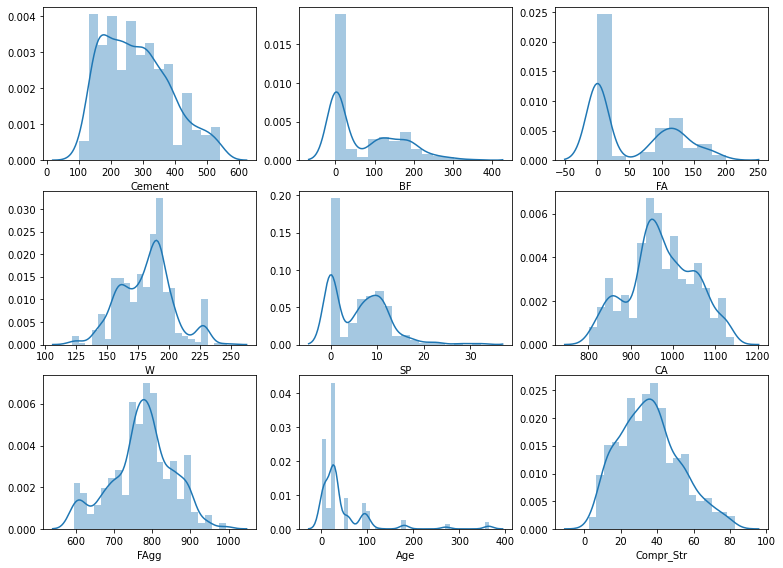

In [6]:
col = df.columns
plt.figure(figsize=(13,13))
for i in range(len(col)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col[i]])

In [7]:
# The Concrete Compressive Strength and the Cement tend to have a normal distribution
# The age, Fine Aggregate, Coarse Aggregate, Superplasticizer, Water,Fly Ash and Blast Furnance Slag distributions have many peak values. It could be a sign of outliers

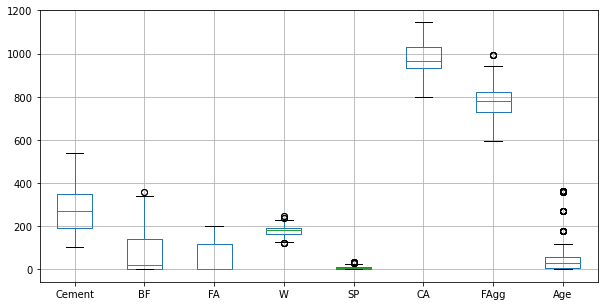

In [8]:
plt.figure(figsize=(10,5))
df.drop(['Compr_Str'],axis=1).boxplot()

In [9]:
# Here we concluded that some values are considered as outliers

In [10]:
df['W/C']=df['W']/df['Cement']
df = df.drop(['W','Cement'],axis=1)

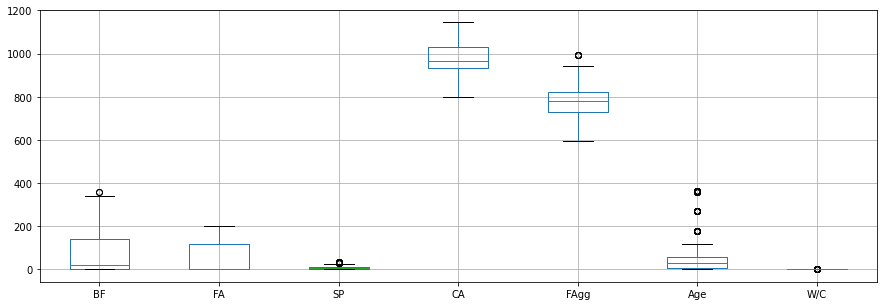

In [11]:
plt.figure(figsize=(15,5))
df.drop(['Compr_Str'],axis=1).boxplot()

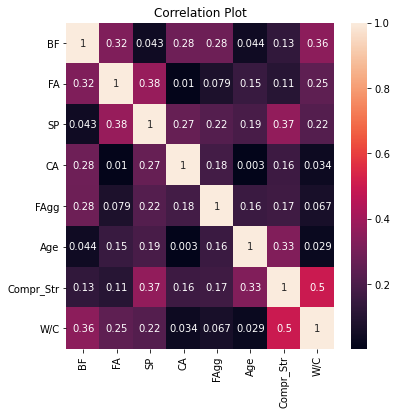

In [12]:
plt.figure(figsize=(6,6))
plt.title('Correlation Plot')
sns.heatmap(abs(df.corr()),annot=True)

## Model Building

In [13]:
# We are going to build a machine learning model that will estimate the compressive strength of concrete made without any superplastizer and an age less than 30 days

In [14]:
X = df[(df['Age']<30)&(df['SP']==0)].drop(['Compr_Str','SP'],axis=1)[['W/C','Age','FA','FAgg']]
Y = df[(df['Age']<30)&(df['SP']==0)][['Compr_Str']]

In [15]:
X

,W/C,Age,FA,FAgg
7,0.600000,28,0.0,594.0
8,0.857143,28,0.0,670.0
9,0.480000,28,0.0,594.0
11,0.966767,28,0.0,825.5
14,0.750000,28,0.0,670.0
...,...,...,...,...
824,0.672185,28,0.0,817.0
825,0.465995,28,0.0,734.0
826,0.400000,3,0.0,721.0
827,0.279693,7,0.0,896.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,make_union
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.compose import make_column_transformer

In [25]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()

In [26]:
non_outliers = lof.fit_predict(X)==1
non_outliers.sum()

254

In [27]:
X = X[non_outliers]
y = Y[non_outliers]

In [28]:
scaler = make_pipeline(RobustScaler(),MinMaxScaler())
preprocessor = make_pipeline(scaler)

### Metrics: 

In [29]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [30]:
def evaluate_model(model,X_train,Y_train,scoring):
    for s in scoring:
        cv_score = cross_val_score(model,X_train,Y_train,scoring=s,cv=5)
        print(s+' mean_cv_score: ',cv_score.mean())
        #print(s+' std_cv_score: ',cv_score.std())

In [43]:
def plot_learning_curve(model,X_train,Y_train,scoring):
    N,train_score,val_score = learning_curve(model,X_train,Y_train,train_sizes=np.arange(0.2,1+0.2,0.2),scoring=scoring)
    plt.plot(N,train_score.mean(axis=1),c='orange',label='train_score')
    plt.plot(N,val_score.mean(axis=1),c='blue',label='val_score')
    plt.title('Learning curves')
    plt.xlabel('Train size')
    plt.ylabel(scoring)
    plt.legend()
    plt.grid()

In [41]:
def optimize(model,grid,X_train,Y_train,scoring):
    gs = GridSearchCV(model,param_grid=grid,scoring=scoring,cv=5)
    gs.fit(X_train,Y_train)
    print('Best Score: ',gs.best_score_)
    print('Best Parameters',gs.best_params_)
    print('Retraining the model:\n ...')
    model = gs.best_estimator_
    model.fit(X_train,Y_train)
    print('Train score',model.score(X_train,Y_train))
    print('Test Score',model.score(X_test,Y_test))
    return model
def regression_reports(model,X_test,Y_test):
    y_pred = model.predict(X_test)
    print('\n')
    print('--- Regression Reports --')
    print('R2    :',model.score(X_test,Y_test))
    print('rMSE   : ',np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('MAE   :',mean_absolute_error(Y_test,y_pred))
    print('MedAE :',median_absolute_error(Y_test,y_pred))

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.15)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = make_pipeline(preprocessor,PolynomialFeatures(degree=3),LinearRegression())
lr.fit(X_train,Y_train.values.ravel())

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('robustscaler',
                                                   RobustScaler()),
                                                  ('minmaxscaler',
                                                   MinMaxScaler())]))])),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

r2 mean_cv_score:  0.8088152097916057
neg_root_mean_squared_error mean_cv_score:  -4.8161599295928115


--- Regression Reports --
R2    : 0.836698015749933
rMSE   :  6.6380077266889055
MAE   : 4.551404885992991
MedAE : 3.0588721873167586


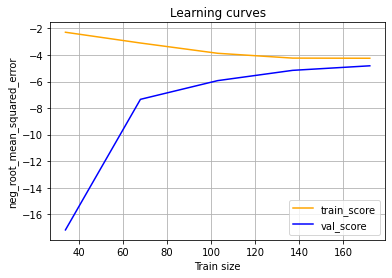

In [44]:
evaluate_model(lr,X_train,Y_train.values.ravel(),scoring=['r2','neg_root_mean_squared_error'])
plot_learning_curve(lr,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
regression_reports(lr,X_test,Y_test)

### Decision Tree Regressor

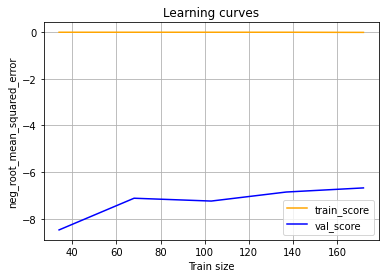

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtree = make_pipeline(preprocessor,DecisionTreeRegressor())
dtree.fit(X_train,Y_train.values.ravel())
plot_learning_curve(dtree,X_train,Y_train.values,scoring='neg_root_mean_squared_error')

In [49]:
evaluate_model(dtree,X_train,Y_train.values,['r2','neg_mean_squared_error','neg_mean_absolute_error','neg_median_absolute_error','neg_root_mean_squared_error'])
regression_reports(dtree,X_test,Y_test)

r2 mean_cv_score:  0.6831002522750153
neg_mean_squared_error mean_cv_score:  -41.374426981130036
neg_mean_absolute_error mean_cv_score:  -4.518470097140001
neg_median_absolute_error mean_cv_score:  -3.413755290956776
neg_root_mean_squared_error mean_cv_score:  -6.339949222244117


--- Regression Reports --
R2    : 0.8291925758659524
rMSE   :  6.788837202943583
MAE   : 5.258429355836749
MedAE : 4.597750427294116


Best Score:  -6.339949222244117
Best Parameters {'decisiontreeregressor__max_depth': 5}
Retraining the model:
 ...
Train score 0.8991809960580038
Test Score 0.8527992312799779


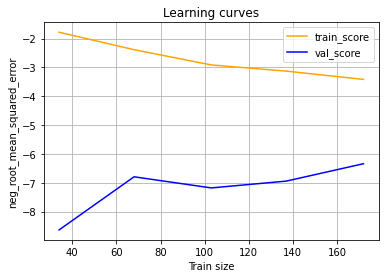

In [50]:
max_depth = np.array([1,4,5,6,7])
grid= {'decisiontreeregressor__max_depth':max_depth}
dtree = optimize(dtree,grid,X_train,Y_train.values,scoring='neg_root_mean_squared_error')
plot_learning_curve(dtree,X_train,Y_train.values,scoring='neg_root_mean_squared_error')

In [51]:
regression_reports(dtree,X_test,Y_test)



--- Regression Reports --
R2    : 0.8527992312799779
rMSE   :  6.302270820571234
MAE   : 4.923945101477774
MedAE : 4.197782695866666


### Support Vector Machine Regressor

neg_mean_squared_error mean_cv_score:  -51.562799871265085


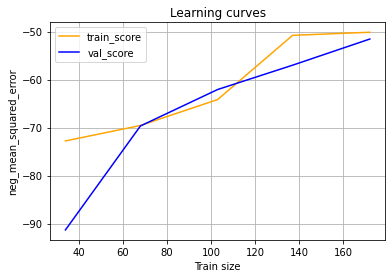

In [52]:
from sklearn.svm import SVR
svr = make_pipeline(preprocessor,SVR(kernel='rbf',C=1,gamma=1))
svr.fit(X_train,Y_train.values.ravel())
evaluate_model(svr,X_train,Y_train.values.ravel(),scoring=['neg_mean_squared_error'])
plot_learning_curve(svr,X_train,Y_train.values.ravel(),scoring='neg_mean_squared_error')

In [53]:
# From the learning curve, we concluded that we suffer from an underfitting problem

Best Score:  -4.489227365551626
Best Parameters {'svr__C': 675, 'svr__gamma': 4}
Retraining the model:
 ...
Train score 0.901161725697556
Test Score 0.9078325805535474


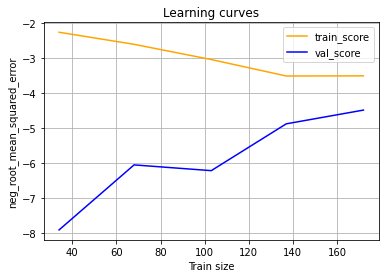

In [78]:
grid = {'svr__C':[675,680,685],'svr__gamma':[2.5,3.5,4]}
svr = optimize(svr,grid,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
plot_learning_curve(svr,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')

In [79]:
evaluate_model(svr,X_train,Y_train.values.ravel(),scoring=['neg_root_mean_squared_error','neg_mean_absolute_error'])
regression_reports(svr,X_test,Y_test)

neg_root_mean_squared_error mean_cv_score:  -4.489227365551626
neg_mean_absolute_error mean_cv_score:  -2.928106141753597


--- Regression Reports --
R2    : 0.9078325805535474
rMSE   :  4.986900885568648
MAE   : 3.3040095667226512
MedAE : 1.8436403804255335


### Random Forest Regressor

In [165]:
# An ensemble methods could work well for the prediction

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(preprocessor,RandomForestRegressor())
rfr.fit(X_train,Y_train.values.ravel())

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('robustscaler',
                                                   RobustScaler()),
                                                  ('minmaxscaler',
                                                   MinMaxScaler())]))])),
                ('randomforestregressor', RandomForestRegressor())])

neg_root_mean_squared_error mean_cv_score:  -5.558988304411126


--- Regression Reports --
R2    : 0.8460609903225813
rMSE   :  6.444902725993991
MAE   : 4.641394206097437
MedAE : 3.203994971999995


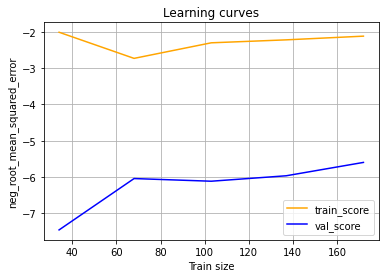

In [84]:
evaluate_model(rfr,X_train,Y_train.values.ravel(),scoring=['neg_root_mean_squared_error'])
plot_learning_curve(rfr,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
regression_reports(rfr,X_test,Y_test)

Best Score:  -5.493572831331933
Best Parameters {'randomforestregressor__max_depth': 50}
Retraining the model:
 ...
Train score 0.9686770507120355
Test Score 0.8442076836998859
neg_median_absolute_error mean_cv_score:  -2.308851039103998
neg_root_mean_squared_error mean_cv_score:  -5.6121934537853075


--- Regression Reports --
R2    : 0.8442076836998859
rMSE   :  6.483582477944293
MAE   : 4.806100652695384
MedAE : 3.205277397360014


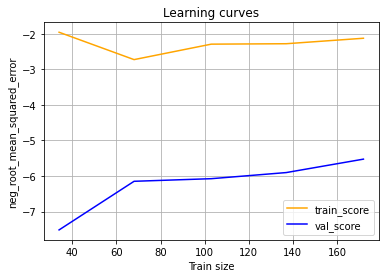

In [93]:
max_depth = np.array([1,40,50,100])
#max_features = np.array([1,2,3,4,5,6,7])
grid = {'randomforestregressor__max_depth':max_depth}
rfr = optimize(rfr,grid,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
plot_learning_curve(rfr,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
evaluate_model(rfr,X_train,Y_train.values.ravel(),scoring=['neg_median_absolute_error','neg_root_mean_squared_error'])
regression_reports(rfr,X_test,Y_test)

### Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = make_pipeline(preprocessor,GradientBoostingRegressor())
gbr.fit(X_train,Y_train.values.ravel())

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('robustscaler',
                                                   RobustScaler()),
                                                  ('minmaxscaler',
                                                   MinMaxScaler())]))])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

Best Score:  -4.636348917630434
Best Parameters {'gradientboostingregressor__max_depth': 2}
Retraining the model:
 ...
Train score 0.9354844630987745
Test Score 0.9109086033654498


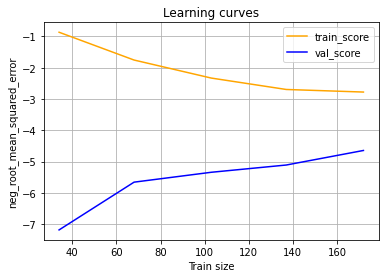

In [96]:
max_depth = np.array([1,2,3,10])
#max_features = np.array([1,2,3,4,5,6,7])
grid = {'gradientboostingregressor__max_depth':max_depth}
gbr = optimize(gbr,grid,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')
plot_learning_curve(gbr,X_train,Y_train.values.ravel(),scoring='neg_root_mean_squared_error')

In [45]:
# The gradient boosting seems not overfit the training data. It needs more data to ameliorate its performance
# For this project, we are going to choose the "Gradient Boosting Regressor" as model

### Save Model

In [97]:
def save_model(model,file_name):
    pickl = {'model':model}	
    pickle.dump(pickl,open(file_name,"wb"))

def load_models(file_name):
    with open(file_name,'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
        return model

In [98]:
save_model(gbr,'gbr_beton.p')
save_model(rfr,'rfr_beton.p')
save_model(dtree,'dtree_beton.p')
save_model(svr,'svr_beton.p')